# Graph Theory (Network Analysis)

## Installation Instructions:

Newer versions of networkx have compatability issues so from your command line run:

`$ pip install networkx==2.3 nxpd`

And then install its dependency:

Mac OS: `brew install graphviz`  
Linux: `sudo apt-get install graphviz`  

It's not a huge deal if you can't get these to work, you don't need either library for the breakouts or assignment. Just don't run any cells in this notebook.

## Graphs Introduction

### Objectives

- [What is a graph?](#what)
- [What are some types of graphs?](#types)
  - Directed vs. undirected
  - Weighted vs. unweighted
  - Connected vs. disconnected
- [How do you talk about graphs?](#concepts)
  - Degree
  - Neighbors
  - Path
  - Cycle
  - Components
- [What are some data structures used to represent graphs?](#structures)
    - Adjacency Matrix
    - Edge List
    - Adjacency List
- [How do you search / traverse a graph?](#search)
  - Breadth First vs Depth First Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from collections import deque

# Standard Python Library for working with graphs
import networkx as nx

# Helper library to visualize graphs
import nxpd

# Some helper functions that Matthew Drury wrote (GraphTools.py)
import GraphTools as gt

plt.style.use('ggplot')
%matplotlib inline

## What is a graph? <a name="what"></a>
A graph is a structure comprised of a set of objects (**nodes**) where some of the objects have a relationship between each other (**edges**).

<img src="images/undirected_graph.png" alt="Drawing" style="width: 300px;"/>

**Nodes** (or **vertices**) 1 through 6, and the connections between them (**edges**). 

Maybe the nodes are people and the edges represent friendship.   
[Here's](https://www.amazon.com/Social-Network-Analysis-Startups-connections-ebook/dp/B006WACLQS) a whole book on analyzing **social networks** using graphs.

### A social graph from Facebook:

<img src="images/facebook-social-graph.jpg" alt="Drawing" style="width: 500px;"/>

- **Nodes** are facebook profiles
- **Edges** are friend connections

### Game of thrones

<img src="images/game_of_thrones.png" alt="Drawing" style="width: 500px;"/>

[Source](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20(1).pdf)  
[Explanation of PageRank](https://www.geeksforgeeks.org/page-rank-algorithm-implementation/)

### Computer connectivity across the Internet:

<img src="images/internet.png" alt="Drawing" style="width: 500px;"/>

- **Nodes** are computers
- **Edges** are direct connections from one computer to another

[Source](http://www.opte.org/the-internet/)

### Paris' Metro:
<img src="images/paris-metro.gif" alt="Drawing" style="width: 400px;"/>

- **Nodes** are subway stations
- **Edges** are subway connections

Graphs are mathematical abstractions; this simplified picture helps our brains comprehend the data in a useful manner.

The **actual** Paris subway's geographic structure look like this:
<img src="images/paris-metro-geo.jpg" alt="Drawing" style="width: 500px;"/>

### Food web
<img src="images/food_web.png" alt="Drawing" style="width: 500px;"/>


[source](https://www.flickr.com/photos/121935927@N06/13578885414)

- **Nodes** are animals in the food chain
- **Edges** represent the consumption of one animal to another. Note that these edges have a direction (trees do not eat giraffes)

### What kinds of relationships can we represent?<a name="types"></a>
<img src="images/undirected_graph.png" alt="Drawing" style="width: 350px;"/>  

In an **undirected graph**, edges represent two-way relationships (e.g. friendships, communications)  

<img src="images/directed-graph_2.png" alt="Drawing" style="width: 400px;"/>  

In a **directed graph**, edges represent one-way relationships (e.g. Twitter followers, phone calls)

<img src="images/airport_graph.gif" alt="Drawing" style="width: 500px;"/>

In a **weighted graph**, edges also have a number (often a sort of **cost**) associated with them.

### Breakout
* What's something that could be represented by an *undirected*, *weighted* graph?
* What about a *directed*, *unweighted* graph?
* Lastly, how about a *directed*, *weighted* graph?

### A bit of history
The original graph: the **Seven Bridges of Königsberg** ([wiki](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg)):
<img src="images/konigsberg.png" alt="Drawing" style="width: 400px;"/>

The question poised was: Is it possible to walk around this city while crossing every bridge *exactly* once?  

Wikipedia:  
"Euler pointed out that the choice of route inside each land mass is irrelevant. The only important feature of a route is the sequence of bridges crossed. This allowed him to reformulate the problem in abstract terms (laying the foundations of **graph theory**), eliminating all features except the list of land masses and the bridges connecting them. 

<img src="images/konigsberg_graph.png" alt="Drawing" style="width: 400px;"/>

In modern terms, one replaces each land mass with an abstract "**vertex**" or **node**, and each bridge with an abstract connection, an "**edge**", which only serves to record which pair of vertices (land masses) is connected by that bridge. The resulting mathematical structure was a **graph**.

**Discussion:** Can you visit all the edges *exactly* once?

### Back to formalities
Formally, a graph $G$ is:

- A set $N$ of **nodes**.  Nodes are abstract entities, can represent pretty much anything, and can have data attached
- A set $E$ of **edges**, which are directed or undirected pairs of nodes

The number of vertices (nodes) $|V|$ is the order of the graph.

The number of edges $|E|$ is the size of the graph.

So, for example, the following represents an unweighted, undirected graph:

$$N = \{0, 1, 2, 3, 4, 5 \}$$
$$E = \left\{ \{0, 1\}, \{0, 4\}, \{1, 2 \}, \{1, 3\}, \{2, 3\}, \{2, 5\}, \{3, 4\}, \{4\} \right\}$$

(There's more than one way to represent this graph, which we'll get to shortly)

**Question:** What is the $\{ 4 \}$ communicating in the edge set?

## Making a graph in Python using Network X

Here's the [documentation.](https://networkx.github.io/documentation/stable/reference/index.html)

{(1, 2), (0, 1), (1, 3), (4, 4), (2, 3), (0, 4), (2, 5), (3, 4)}


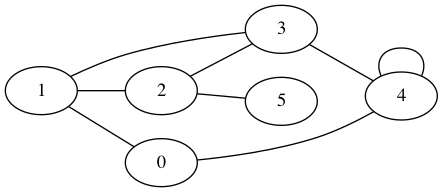

In [2]:
edge_list = {(4,4), (0,4), (1,2), (1,3), 
             (2,3), (2,5), (3,4), (0,1), (0,1)}
print(edge_list)
G = nx.from_edgelist(edge_list)
G.graph['rankdir'] = 'LR' #'LR' # or 'UD'
nxpd.draw(G, show='ipynb')

[(0, 1), (0, 4), (1, 2), (1, 3), (2, 3), (2, 5), (3, 4), (4, 4), (0, 1)]


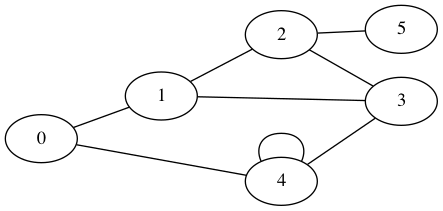

In [3]:
# graph visualizations are not unique
edge_list = [(0,1), (0,4), (1,2), (1,3), 
             (2,3), (2,5), (3,4), (4,4), (0,1)]
print(edge_list)
G = nx.from_edgelist(edge_list)
G.graph['rankdir'] = 'LR'
nxpd.draw(G, show='ipynb')

## Data Structures for Graphs<a name="structures"></a>

There are three main data structures used for representing a graph.

- **Edge list**: a list of the edges (and weights, if applicable)

- **Adjacency list**: a dictionary containing each node & its list of neighbors.

- **Adjacency matrix**: a square matrix with rows and columns indexed by the nodes.  The entries in the matrix are either $0$ or $1$, depending on whether the nodes are linked with an edge.  [Wikipedia](https://en.wikipedia.org/wiki/Adjacency_matrix)

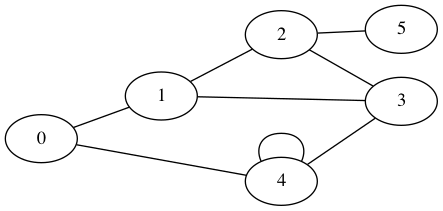

In [4]:
nxpd.draw(G, show='ipynb')

The *edge list* representation of the graph above is:

In [5]:
g_edg = [(0, 1), (0, 4), (1, 2), (1, 3),
         (2, 3), (2, 5), (3, 4), (4, 4)]

The *adjacency list* representation of the above graph is:

In [6]:
g_adj = {
    0: [1, 4],
    1: [0, 2, 3],
    2: [1, 3, 5],
    3: [1, 2, 4],
    4: [0, 3, 4],
    5: [2]
}

The *adjacency matrix* representation of the above graph is:

In [7]:
g_matrix = np.array([
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0]
])
# Bit easier to parse in pandas
df = pd.DataFrame(data=g_matrix, index=range(6), columns=range(6))

In [8]:
df.style.set_table_attributes('style="font-size: 20px"')

,0,1,2,3,4,5
0,0,1,0,0,1,0
1,1,0,1,1,0,0
2,0,1,0,1,0,1
3,0,1,1,0,1,0
4,1,0,0,1,1,0
5,0,0,1,0,0,0


The Python library's `networkx` and `nxpd` can be used to manipulate and visualize graphs from all three of these representations:

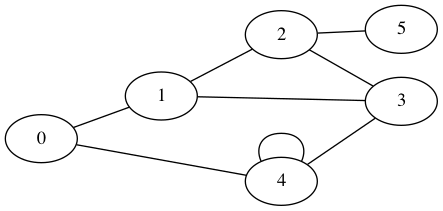

In [9]:
G = nx.from_edgelist(g_edg)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

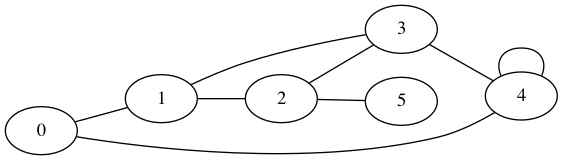

In [10]:
G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

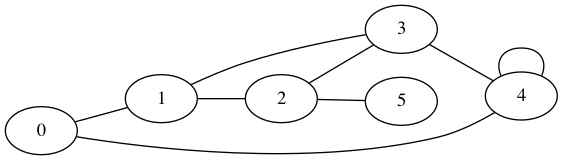

In [11]:
G = nx.from_numpy_matrix(g_matrix)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

### Breakout  


![](images/directed-graph_2.png)

1. Determine the adjacency matrix for this directed graph.

<details><summary>Answer</summary>

![](images/directed_solution.png)

</details>

   
![](images/weighted_1.png)
2. Determine the adjacency matrix for this weighted graph. If the edges represent a cost, what number should we use for "no-edge" cells?


<details><summary>Answer</summary>
    
![](images/weighted_solution.png)
    
</details>

### Data Structures for Graphs: Pros and Cons

**Adjacency matrix**:

Square matrix with rows and columns indexed by the nodes.
  - **PRO**: Easy to understand and interpret
  - **PRO**: Many operations are quite fast
      - *If we want to know whether two people are directly connected, we just look up the relevant row and column*


  - **CON**: *No-edge* cells take up same amount of memory as other cells
      - *Most larger networks are very low densities (less than .1% of the possible edges are positive), so those no-edges will waste a ***lot*** of space*   

**Edge list**:

List of the edges (and weights, if applicable).
  - **PRO**: Much less space in memory for large and sparse networks
  - **PRO**: Maps nicely into tabular (*SQL*) databases and text based formats


  - **CON**: Searching and traversal of graph is slow
      - *If we want to know whether two people are directly connected, we have to search through the entire edge list and see if we have that edge*

**Adjacency list**:

Dictionary containing each node & its list of neighbors.
  - **PRO**: Much less space in memory for large and sparse networks
  - **PRO**: Fast searching and traversal, much faster than edge lists
  - **PRO**: Easy to add/remove nodes and edges


  - **CON**: Harder to write/ parse from databases and text

### Beware of |V|<sup>2</sup> 
In 2012, LinkedIn had approximately 100 million users. How large would an adjacency matrix of 2012 LinkedIn's social graph be? Could we store this on a personal computer?

<details><summary>Answer</summary>
<p>

We need 100 million rows and 100 million columns of 1 bit each, so 10<sup>8</sup> * 10<sup>8</sup> = 10<sup>16</sup> bits or ~10<sup>15</sup> bytes. A terabyte is 10<sup>12</sup> bytes, so we're dealing with thousands of terabytes of storage. 
    
So no, you shouldn't store that on your computer.

</p>
</details>

Bonus: Suppose 2012 LinkedIn users had 50 connections on average. How large would an edge list of 2012 LinkedIn's social graph be? (Assume that we store user ids in 32 bit integers)

<details><summary>Answer</summary>
<p>

With 100 million users and 50 connections on average, we have 50\*10<sup>8</sup> = 5 billion edges. Each edge has two 32-bit numbers or 8 bytes total, so 5 billion \* 8 bytes = 40 GB = .04 TB. *Way* more managable.

</p>
</details>

## Basic Graph Concepts<a name="concepts"></a>

The **neighbors** of a node are all those connected to it by an edge.

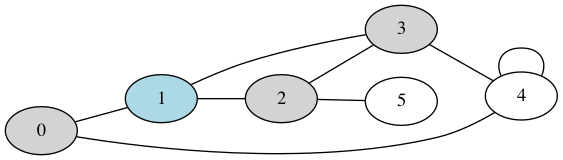

In [12]:
gt.color_nodes(G, [1], 'lightblue')
gt.color_nodes(G, G.neighbors(1), 'lightgrey')
nxpd.draw(G, show='ipynb')

The **degree** of a node is the number of neighbors it has.

$$d(0) = 2$$
$$d(1) = 3$$

*Note*: A directed graph also has an **in-degree**, the number of edges going into the node, and an **out-degree**, the number of edges going from the node.

A **path** is a series of edges that connect two nodes.

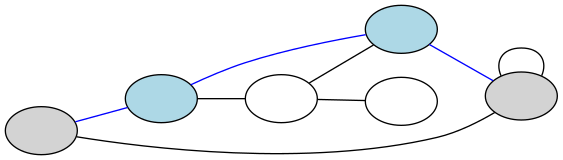

In [13]:
gt.reset_graph(G)
gt.color_nodes(G, [0, 4], 'lightgrey')
gt.color_nodes(G, [1, 3], 'lightblue')
gt.color_edges(G, [(0, 1), (1, 3), (3, 4)], 'blue')
nxpd.draw(G, show='ipynb')

A graph is **connected** if every pair of nodes is connected by some path.

A graph is **disconnected** if it is not connected.  In this case, each connected piece of the graph is called a **component**.

In [ ]:
g_disconnected = {
    0: {5},
    1: {2, 3},
    2: {1, 3},
    3: {1, 2, 4},
    4: {3, 4},
    5: {0}
}

G_disconnected = nx.from_dict_of_lists(g_disconnected)
G_disconnected.graph['rankdir'] = 'LR'

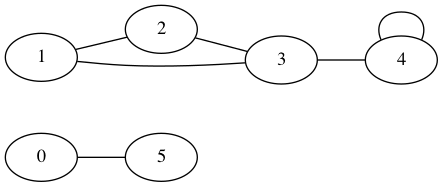

In [14]:
nxpd.draw(G_disconnected, show='ipynb')

**Question**: Is Facebook's social graph connected? Is it close?

A **cycle** in a graph is a sequence of edges that returns to the same node from which it began:

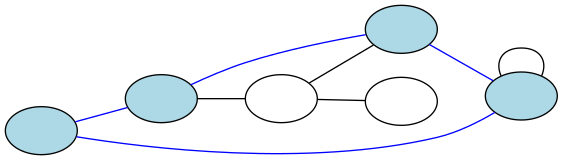

In [15]:
gt.reset_graph(G)
gt.color_nodes(G, [0, 1, 3, 4], 'lightblue')
gt.color_edges(G, [(0, 1), (1, 3), (3, 4), (4, 0)], 'blue')
nxpd.draw(G, show='ipynb')

A **tree** is a directed graph with no cycles. (Directed Acyclic Graph - DAG)

In [16]:
def convert_adj_list_to_edge_list(adj_list):
    edge_list = set()
    for node, child_nodes in adj_list.items():
        for child in child_nodes:
            edge_list.add((node, child))
    return edge_list

In [17]:
g_tree = {
    0: {1, 2},
    1: {3, 4},
    2: {5, 6},
    3: {},
    4: {},
    5: {},
    6: {7, 8},
    7: {},
    8: {}
}
g_tree_edge_list = convert_adj_list_to_edge_list(g_tree)
G_tree = nx.DiGraph()
G_tree.add_nodes_from(g_tree)
G_tree.add_edges_from(g_tree_edge_list)

Edge list:
{(0, 1), (1, 3), (2, 6), (6, 8), (6, 7), (1, 4), (2, 5), (0, 2)}
Adjacency list:
{0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: {}, 4: {}, 5: {}, 6: {8, 7}, 7: {}, 8: {}}


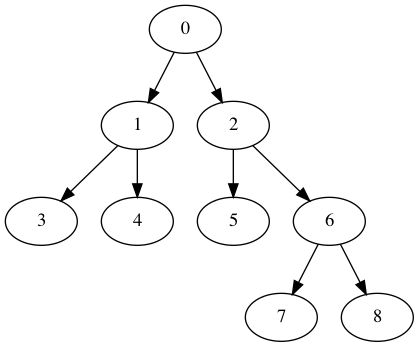

In [18]:
print("Edge list:")
print(g_tree_edge_list)
print("Adjacency list:")
print(g_tree)
nxpd.draw(G_tree, show='ipynb')

Trees are used as fundamental data structures in computer science:
- Hash tables
- Data bases
- Sorting Algorithms

And we've been using them through the course.

## Terminology Review

- **Node/Vertex**: A node or vertex is a single point in a graph. 
- **Neighbors**: The neighbors of a node are the nodes that it is connected to. 
- **Degree**: The degree of a node is the number of neighbors a node has (often denoted ki). In the case of a directed graph, the degree of a node is split into indegree and outdegree. 
- **Walk**: A walk is a sequence of nodes and edges that connect them. A walk is said to be open if the starting and ending nodes are different and closed otherwise. The length of the walk is the number of edges.
- **Trail**: is defined as a walk with no repeated edges. 
- **Path**: A path is a walk where no node is crossed twice (called a simple walk). A closed path is known as a cycle.

- **Connected**: A graph is connected if every pair of vertices is connected by some path (i.e. they are either directly connected by an edge(s) or there exists a walk between them) 
- **Subgraph**: A subgraph is a subset of the nodes of a graph and all the edges between them. 
- **Connected Component**: A connected component is a subgraph that is connected and which is connected to no additional vertices in the supergraph. 
- **Completed**: A graph is completed if all vertices are connected. 
- **Graph Diameter**: The diameter of a graph is the largest number of vertices that must be traversed in order to get from one vertex to any other vertex.

## Search and Traversal Algorithms for Graphs<a name="search"></a>

To search around in a graph, you'll typically have to traverse it.

A **traversal algorithm** is a method for visiting every node in a graph.

A **search algorithm** is a method for searching for a specified node in a graph.

In practice, these two types of algorithms are almost interchangable: to turn a traversal algorithm into a search algorithm you simply need to provide a stopping criteria (in this case, the node you are searching for).

We will examine traversal algorithms to demonstrate the difference between the methods, but the same ideas apply to the search algorithms.

### Breadth First
In **breadth first** algorithms we traverse the graph by prioritizing visiting all the *neighbors* of nodes before visiting *more neighbors*.

### Depth First
In **depth first** algorithms we traverse the graph by prioritizing visiting a *child* and the *child's child*, iteratively, before backtracking and visiting the *sibling* nodes.

We're using the term child loosely here as "How far away is this node from our base node". There are no children in a graph, only neighbors.

![](images/b_v_d.png)

### Helpful to graph traversal: Stack and Queue

Review data structures.  **Stack** and **Queue**.

- Stack:
    - Ordering: Last In, First Out (LIFO)
    - Insertion/Removal of items: Same end of chain
    - Analogy: a stack of dishes
- Queue:
    - Ordering: First In, First Out (FIFO) ordering
    - Insertion/Removal of items: Opposite ends of chain (insert at end, remove at front)
    - Analogy: line for movie premiere (if we were British, we'd already use the word queue instead of line)


**Further Reading:** Python docs have short discussion of data structures to use for stacks and queues:
https://docs.python.org/3/tutorial/datastructures.html#data-structures

#### Breadth First Traversal (BFT) Pseudocode.

    Initialize a queue, Q, with starting node.
    Initialize an empty set *V* of visited nodes.

    While Q is not empty:
        Pop (earliest added) node from Q, call it node.
        if node is not in V (hasn't been visited)
            Add node to V
            Add every neighbor of node to (the end of) Q.

Real code:

In [19]:
def breadth_first_traversal(G, initial_node):
    Q = deque([initial_node]) # deque is a double-edged queue

    # Using a list to preserve the order nodes were visited.
    visited = [] 

    while len(Q) != 0:
        node = Q.popleft() # pop from the left
        if node not in visited:
            visited.append(node)
            Q.extend(G.neighbors(node)) # extend to the right side

    return visited

In [20]:
g_adj = {
    0: [1, 4],
    1: [0, 2, 3],
    2: [5, 3, 1],
    3: [1, 2, 4],
    4: [0, 3, 4],
    5: [2]
}

G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

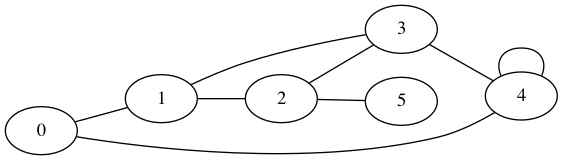

In [21]:
nxpd.draw(G, show='ipynb')

In [22]:
# what order should we visit the nodes starting at node 3?
breadth_first_traversal(G, 3)

[3, 1, 2, 4, 0, 5]

**Question:** What information does the *order nodes are visited* in the breadth first traversal algorithm contain?

Many (*many*) algorithms are some modification of a breadth first search traversal, taking the general traversal structure and adding some additional operation to calculate some property. Today's assignment, for instance, will use the BFT to find the shortest path between two nodes. 

**Applications:**

- Shortest path in unweighted graph
- Crawlers in search engines

#### Depth First Traversal (DFT) Pseudocode.

    Initialize a stack, S, with initial node
    Initialize an empty set *V* of visited nodes

    While S is not empty:
        Pop (last added) node from S, call it node
        if node is not in V (not already visited)
            Add node to V
            Add every neighbor of node to (the end of) S
            
Note how similiar to BFT this is, the only difference is we use a *stack* instead of a *queue*.

In [23]:
def depth_first_traversal(G, initial_node):
    S = deque([initial_node])

    # Using a list to preserve the order nodes were visited.
    visited = [] 

    while len(S) != 0:
        node = S.pop() # pop from the right
        if node not in visited:
            visited.append(node)
            S.extend(G.neighbors(node)) # extend to the right side

    return visited

In [24]:
g_adj = {
    0: [1, 4],
    2: [1, 3, 5],
    3: [1, 4, 2],
    4: [4, 3, 0],
    5: [2],
    1: [0, 2, 3],
}

G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

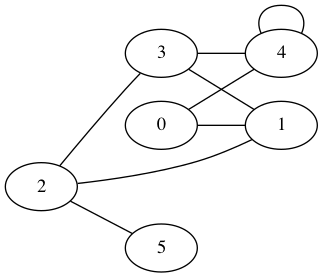

In [25]:
nxpd.draw(G, show='ipynb')

In [26]:
depth_first_traversal(G, 3)

[3, 4, 0, 1, 2, 5]

**Applications:**

- Finding leaf nodes of a tree
- Solving a maze

## Objectives
- [What is a graph?](#what)
- [What are some types of graphs?](#types)
  - Directed vs. undirected
  - Weighted vs. unweighted
  - Connected vs. disconnected
- [What are some data structures used to represent graphs?](#structures)
    - Adjacency Matrix
    - Edge List
    - Adjacency List
- [How do you talk about graphs?](#concepts)
  - Degree
  - Neighbors
  - Path
  - Cycle
  - Components
- [How do you search / traverse a graph?](#search)
  - Breadth First vs Depth First Search

### Other Graph Applications
* Community detection
* Node importance (e.g [pagerank](https://www.geeksforgeeks.org/page-rank-algorithm-implementation/))

You can look into the `graphs-communities` lecture folder for details on this.

* Path optimization (e.g [travelling salesman](https://en.wikipedia.org/wiki/Travelling_salesman_problem)-esque problems)
* [Optimizing circuitry](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem)
* [Proving (NxN) Sudoku can optimize circuitry](http://www.ijarcs.info/index.php/Ijarcs/article/view/6096) if you really wanted to
* And many more

Seriously, graphs have an enormous amount of application and theory behind them.